In [23]:
import import_ipynb
from numba import jit
from StructureEvolution import *
from scipy.integrate import quad
from scipy.special import spherical_jn

import os.path
if not os.path.isfile('delta.csv'):
    structure_solve()
else:
    δ = np.loadtxt('delta.csv', delimiter=',')
    δb = np.loadtxt('deltab.csv', delimiter=',')
    v = np.loadtxt('v.csv', delimiter=',')
    vb = np.loadtxt('vb.csv', delimiter=',')
    Φ = np.loadtxt('phi.csv', delimiter=',')
    Ψ = np.loadtxt('psi.csv', delimiter=',')
    Θ[:, 0, :] = np.loadtxt('theta0.csv', delimiter=',')
    Θ[:, 1, :] = np.loadtxt('theta1.csv', delimiter=',')
    Θ[:, 2, :] = np.loadtxt('theta2.csv', delimiter=',')
    Θ[:, 3, :] = np.loadtxt('theta3.csv', delimiter=',')
    Θ[:, 4, :] = np.loadtxt('theta4.csv', delimiter=',')
    Θ[:, 5, :] = np.loadtxt('theta5.csv', delimiter=',')
    dvb = np.loadtxt('dvb.csv', delimiter=',')
    dΦ = np.loadtxt('dphi.csv', delimiter=',')
    dΨ = np.loadtxt('dpsi.csv', delimiter=',')
    dΘ[:, 0, :] = np.loadtxt('dtheta0.csv', delimiter=',')
    dΘ[:, 1, :] = np.loadtxt('dtheta1.csv', delimiter=',')
    dΘ[:, 2, :] = np.loadtxt('dtheta2.csv', delimiter=',')
    dΘ[:, 3, :] = np.loadtxt('dtheta3.csv', delimiter=',')
    dΘ[:, 4, :] = np.loadtxt('dtheta4.csv', delimiter=',')
    dΘ[:, 5, :] = np.loadtxt('dtheta5.csv', delimiter=',')
    print('Variables loaded')

ValueError: could not broadcast input array from shape (500,100) into shape (1000,100)

In [40]:
l_array = np.array([2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2150, 2300, 2450, 2600, 2750, 2900, 3000, 3200, 3400, 3600, 3800, 4000])
#l_array = np.array([2, 140, 550, 700, 1000, 1900, 2600, 3000, 3600, 4000])
#l_array = np.array([2, 20, 60, 160, 300, 600, 800, 1000, 1050, 1250, 1500])
kpivot_Mpc = .05
kpivot = kpivot_Mpc/m2Mpc
ns = .96
A_s = 2.0e-9
lmax = 1500
ls = l_array[l_array < lmax]
#ls = l_array
n_l = len(ls)
np.shape(l_array)
print(n_l)

52


In [3]:
#plt.plot(l_array, color='b')
#plt.plot([i for i in range(75)], [i**2/1.4 for i in range(75)], color = 'k')

ggg = 0
for i in range(75):
    if i%7==0:
        ggg += 1

ls = np.zeros(ggg)
ind = 0
for i in range(75):
    if i%7==0:
        if ind == 0:
            ls[ind] = 2.0
        else:
            ls[ind] = i**2/1.4
        #ls[ind] = i**2/1.4
        ind += 1

n_l = len(ls)
print(ls)
print(n_l)
np.shape(ls)

[2.000e+00 3.500e+01 1.400e+02 3.150e+02 5.600e+02 8.750e+02 1.260e+03
 1.715e+03 2.240e+03 2.835e+03 3.500e+03]
11


(11,)

In [41]:
def cell_TT(l):
    """The CMB power specturm l(l + 1)/2π Cell in units of (μK)^2"""
    
    return

def matter_power_spectrum(k, x):
    """The matter power-spectrum at wavenumber k at time x = ln(a)"""
    
    return

def primordial_power_spectrum(k):
    """The primordial power-spectrum Δ(k) in P(k) = 2π^2/k^3 Δ(k)"""
    
    return A_s*(k/kpivot)**(ns - 1.0)

In [42]:
class Spherical_Bessel:
    def __init__(self, j_l_spline):
        self.j_l_spline = j_l_spline
        
    def make_spline(self):
        self.j_l_spline = BSpline(j_l_args, j_l, k=spline_order)
        return self.j_l_spline

In [43]:
# Create splines of Bessel functions j_l needed below for all ls in 'ls'
ini_spl = interp1d([1, 2, 3, 4], [1, 2, 3, 4], kind=spline_order)

n_args = 5400
j_l_args = np.linspace(0, 3500, n_args, endpoint=True)

j_l_splines = np.ndarray((n_l,), dtype=np.object)

'''
print(ls[0])
jltest = spherical_jn(0, np.linspace(ls[0], 3500, n_args, endpoint=True))
print(jltest)
#plt.xlim(0, 100)
plt.plot(j_l_args, jltest, 'b')
jltest = spherical_jn(0, np.linspace(ls[-1], 3500, n_args, endpoint=True))
plt.plot(j_l_args, jltest, 'r')
plt.show()
'''

for i in range(n_l):
    j_l = spherical_jn(ls[i], j_l_args)
    
    j_l_splines[i] = Spherical_Bessel(j_l_spline=ini_spl)
    j_l_splines[i].make_spline()

In [44]:
def source_function():
    S_small = np.zeros(shape = (500, nk))
    S = np.zeros(shape = (n_high_res, n_high_res))
    
    x_grid = np.linspace(xinit, x_end, 500)
    
    #for i in range(n_grid, ntotal):
    for i in range(0, 500):
        g = gspl(x_grid[i])[0]
        dg = g2spl(x_grid[i])[0]
        ddg = g22spl(x_grid[i])[0]
        τ = τspl(x_grid[i])[0]
        dτ = τ2spl(x_grid[i])[0]
        ddτ = τ22spl(x_grid[i])[0]
        hp = getHPrime(x_grid[i])
        dhp = getdHPrime(x_grid[i])
        ddhhp = .5*H0**2.0*((Ωb + Ωm)/np.exp(x_grid[i]) + 4.0*Ωr/np.exp(2.0*x_grid[i]) + 4.0*ΩΛ*np.exp(2.0*x_grid[i]))
    
        for j in range(nk):
            Π = Θ[ntight + i, 2, j]
            dΠ = dΘ[i, 2, j]
            ddΠ = .4*c*ks[j]*(-dhp*Θ[ntight + i, 1, j]/hp + dΘ[i, 1, j])/hp + .3*(ddτ*Π + dτ*dΠ) - (.6*c*ks[j]/hp)*((-dhp/hp)*Θ[ntight + i, 3, j] + dΘ[i, 3, j])
            
            part1 = g*(Θ[ntight + i, 0, j] + Ψ[ntight + i, j] + Π/4.0)
            part2 = np.exp(-τ)*(dΨ[i, j] - dΦ[i, j])
            part3 = -(1.0/(c*ks[j]))*(g*vb[ntight + i, j]*dhp + g*hp*dvb[i, j] + hp*vb[ntight + i, j]*dg)
            part4 = ((3.0/4.0)/(c**2.0*ks[j]**2.0))*(ddhhp*g*Π + 3.0*hp*dhp*(dg*Π + g*dΠ) + hp**2.0*(ddg*Π + 2.0*dg*dΠ + g*ddΠ))
            
            S_small[i, j] = part1 + part2 + part3 + part4       
    
    S_small_spl = RectBivariateSpline(x_grid, ks, S_small)
    
    # x-values during and after recombination
    x_brecomb = np.linspace(-math.log(1631.4), -math.log(615.2), 2000)
    x_arecomb = np.linspace(-math.log(615.2), 0.0, 3000, endpoint=True)
    
    x_final_high_res = np.concatenate((x_brecomb, x_arecomb), axis=0)
    
    ks_final_high_res = np.zeros(n_high_res)
    for i in range(n_high_res):
        ks_high_res[i] = kmin + (kmax - kmin)*(i/100.0)**2.0
    
    
    for i in range(n_high_res):
        for j in range(n_high_res):
            #S[i, j] = S_small_spl(x_grid_high_res[i], ks_high_res[j])
            S[i, j] = S_small_spl(x_final_high_res[i], ks_final_high_res[j])
            
            
            
    S_spl = RectBivariateSpline(x_grid_high_res, ks_high_res, S)
        
    return S_spl

In [46]:
# Set up k-array to evaluate Θ_l on
n_high_res = 5000

ks_high_res = np.zeros(n_high_res)
for i in range(nk):
    ks_high_res[i] = kmin + (kmax - kmin)*(i/100.0)**2.0

#ks_high_res = np.exp(np.linspace(np.log(kmin), np.log(kmax), num=n_high_res))

xstartrec = -np.log(1.0 + 1630.4)
x_grid_high_res = np.linspace(xstartrec, x_end, n_high_res, endpoint=True)

S_spl = source_function()

η_high_res = np.linspace(η_grid[0], η_grid[-1], n_high_res, endpoint=True)

In [47]:
j_l_splines[0].j_l_spline(ks_high_res[0]*(η_ini - η_spline(x_grid[0])))

array([0.2016167])

In [48]:
Θ_lk = np.zeros(shape = (n_l, n_high_res))

# Solve for Θ_l(k) for all k in k-array for all l in l-array
def Θ_integrand(x, k, l):
    return S_spl(x, k)*j_l_splines[l].j_l_spline(ks_high_res[k]*(η_ini - η_spline(x)))

C_l = np.zeros(n_l)
C_ls = np.zeros(n_l)
start = timeit.default_timer()
for l in range(n_l):
    print('-------------')
    print('i:', l)
    
    l0 = ls[l]
    print('l0:', l0)    
    
    for k in range(n_high_res):
        #if k%500==0:
        #    print('---------------')
        #    
        #    print(k)
        k0 = ks_high_res[k]
        Θ_lk[l, k] = quad(Θ_integrand, -np.inf, 0, args=(k, l))[0]
        
        #C_l[l] = C_l[l] + (c*k0/H0)**(ns - 1.0) * (Θ_lk[l, k]**2.0) * ((1.0/4999.0)/(k0))
        
    #C_ls[l] = C_l[l] * (ls[l] * (ls[l] + 1.0))/(2.0*np.pi)
    
    
stop = timeit.default_timer()
print('Time:', stop - start)

-------------
i: 0
l0: 2


C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.


-------------
i: 1
l0: 3
-------------
i: 2
l0: 4
-------------
i: 3
l0: 5
-------------
i: 4
l0: 6
-------------
i: 5
l0: 7
-------------
i: 6
l0: 8
-------------
i: 7
l0: 10


C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


-------------
i: 8
l0: 12
-------------
i: 9
l0: 15
-------------
i: 10
l0: 20
-------------
i: 11
l0: 25
-------------
i: 12
l0: 30
-------------
i: 13
l0: 40
-------------
i: 14
l0: 50
-------------
i: 15
l0: 60
-------------
i: 16
l0: 70
-------------
i: 17
l0: 80


C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


-------------
i: 18
l0: 90
-------------
i: 19
l0: 100
-------------
i: 20
l0: 120
-------------
i: 21
l0: 140
-------------
i: 22
l0: 160
-------------
i: 23
l0: 180
-------------
i: 24
l0: 200
-------------
i: 25
l0: 225
-------------
i: 26
l0: 250
-------------
i: 27
l0: 275
-------------
i: 28
l0: 300
-------------
i: 29
l0: 350
-------------
i: 30
l0: 400
-------------
i: 31
l0: 450
-------------
i: 32
l0: 500
-------------
i: 33
l0: 550
-------------
i: 34
l0: 600
-------------
i: 35
l0: 650
-------------
i: 36
l0: 700
-------------
i: 37
l0: 750
-------------
i: 38
l0: 800
-------------
i: 39
l0: 850
-------------
i: 40
l0: 900
-------------
i: 41
l0: 950
-------------
i: 42
l0: 1000
-------------
i: 43
l0: 1050
-------------
i: 44
l0: 1100
-------------
i: 45
l0: 1150
-------------
i: 46
l0: 1200
-------------
i: 47
l0: 1250
-------------
i: 48
l0: 1300
-------------
i: 49
l0: 1350
-------------
i: 50
l0: 1400
-------------
i: 51
l0: 1450
Time: 10866.293544000015


In [49]:
# Spline Θ_l(k) for all l
Θlk_spl = RectBivariateSpline(ls, ks_high_res, Θ_lk)

In [52]:
def C_l_integrand(x, l0):
    
    return (A_s/x)*((x/kpivot)**(ns - 1.0))*Θlk_spl(l0, x)**2.0

C_l = np.zeros(n_l)

for l in range(n_l):
    l0 = ls[l]
    C_l[l] = (4.0*np.pi)*quad(C_l_integrand, 0, np.inf, args=(l0))[0]
    
print(C_l)

C_ls = [(ls[l]*(ls[l] + 1.0)/(2.0*np.pi))*C_l[l] for l in range(n_l)]

print(C_ls)

C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if __name__ == '__main__':


[3.51832663e+152 2.24679182e+154 4.77720643e+155 7.24728764e+156
 1.02052900e+158 1.42298030e+159 5.65659268e+159 4.10497588e+160
 2.46638272e+161 3.35624509e+191 2.21034485e+193 9.21773378e+190
 2.22982655e+193 2.21754266e+193 2.13586616e+193 1.94413809e+193
 1.61338527e+193 1.14994428e+193 6.22251167e+192 1.74421952e+192
 2.59547370e+192 1.75688622e+193 1.90631367e+193 9.59871207e+191
 1.31658281e+193 1.21137954e+193 1.49163457e+193 2.01474439e+193
 2.10789069e+193 4.64932858e+191 1.01833820e+193 1.39734449e+193
 3.24828546e+192 1.20357880e+193 1.80038500e+192 9.12688081e+192
 3.57731935e+192 6.20738778e+192 9.92306232e+192 1.89527935e+193
 1.80365470e+193 4.64029479e+192 1.36442346e+193 8.75200741e+191
 3.84518688e+191 9.20052570e+192 9.76368018e+192 1.50776613e+193
 1.29060913e+193 1.47389875e+193 2.44824063e+190 1.04794415e+193]
[3.359754444559052e+152, 4.2910562864123624e+154, 1.5206320348299777e+156, 3.460324953588077e+157, 6.821733842323625e+158, 1.268256353341442e+160, 6.48197

In [51]:
# Integrate to get C_l for all l

def Cl_integrand(x, l):
    
    return ((c*x/H0)**(ns - 1.0))*(Θlk_spl(l, x)**2.0)*(1.0/x)

C_l = np.zeros(n_l)

for l in range(n_l):
    C_l[i] = quad(Cl_integrand, 0, np.inf, args=(l))[0]

print(C_l)

C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


IndexError: index 99 is out of bounds for axis 0 with size 52

In [53]:
# Spline C_l
print(C_ls)
C_ls_spl = BSpline(ls, C_ls, k=spline_order)

[3.359754444559052e+152, 4.2910562864123624e+154, 1.5206320348299777e+156, 3.460324953588077e+157, 6.821733842323625e+158, 1.268256353341442e+160, 6.481977735858778e+160, 7.186599222347382e+161, 6.123577226731375e+162, 1.281991192987683e+193, 1.4775066936875484e+195, 9.535811317717877e+192, 3.3004576336783403e+195, 5.788099169907942e+195, 8.668308241868501e+195, 1.1324742266642007e+196, 1.276187856142983e+196, 1.1859651673118832e+196, 8.110913195575235e+195, 2.8037717074239993e+195, 5.997957459661007e+195, 5.519642065509914e+196, 7.815564521346588e+196, 4.977189499959554e+195, 8.423534642819769e+196, 9.803729606341832e+196, 1.4896913730379645e+197, 2.4337830525903815e+197, 3.0293954381716314e+197, 9.090453147973341e+195, 2.599659864173856e+197, 4.513491978076661e+197, 1.2950366219403814e+197, 5.80508987501407e+197, 1.0332638636256229e+197, 6.14662695098734e+197, 2.7937909196676955e+197, 5.5645520522140754e+197, 1.012018271748177e+198, 2.181935201601553e+198, 2.327774092649914e+198, 6.6

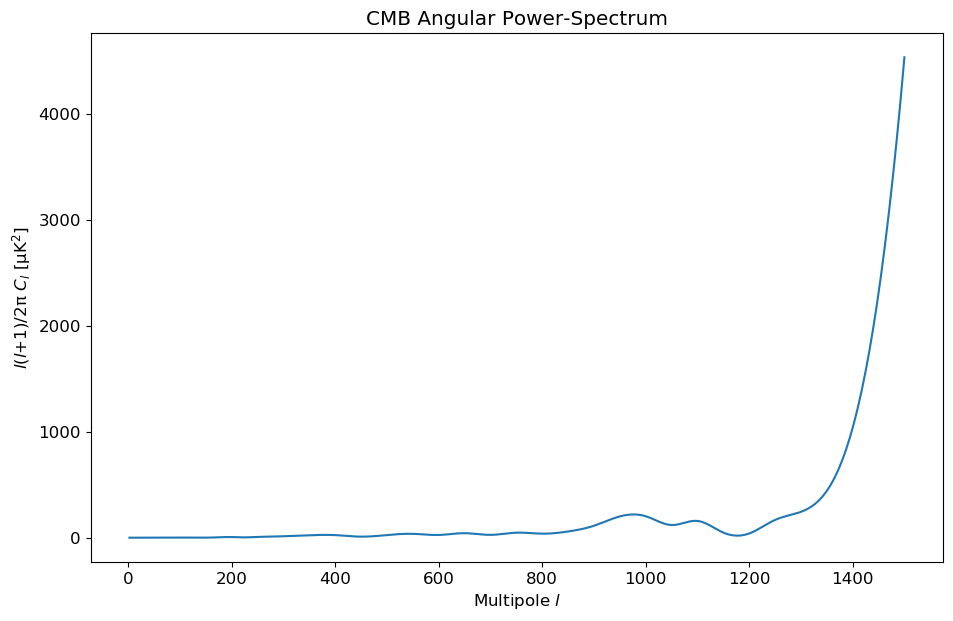

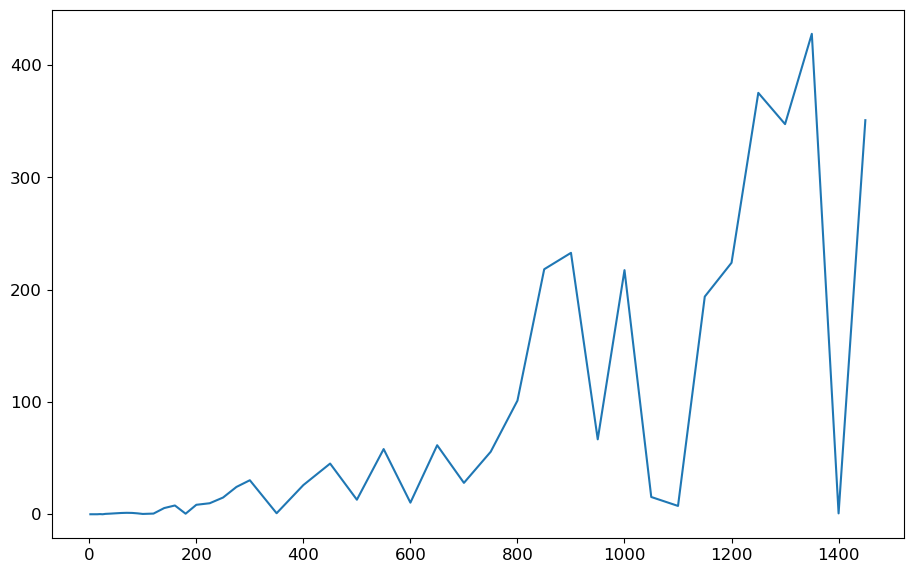

In [75]:
#Pk = np.array([matter_power_spectrum(k, x) for k in ks]).flatten()
#plt.xscale('log')
#plt.yscale('log')
#plt.plot(ks*m2Mpc, Pk/m2Mpc**2.0)
#plt.show()


#ls_plot = np.exp( np.linspace(np.log(2.0), np.log(lmax), 200) )
ls_plot = np.linspace(2.0, lmax, 200)
plt.figure(figsize=(11, 7), dpi = 100)
plt.title('CMB Angular Power-Spectrum')
plt.xlabel('Multipole $l$')
plt.ylabel('$l$($l$+1)/2π $C_l$ [μK$^2$]')
#plt.xscale('log')
#plt.yscale('log')
for i in range(n_l):
    data_C_ls = C_ls_spl(ls_plot)/1e196
plt.plot(ls_plot, data_C_ls)
plt.show()




plt.figure(figsize=(11, 7), dpi = 100)

C_ls_mod = [C_ls[i]/1e196for i in range(len(C_ls))]
plt.plot(ls, C_ls_mod)
plt.show()
